In [1]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4978 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8903


In [3]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3555 - accuracy: 0.8732


In [24]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4679 - accuracy: 0.8286
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3162 - accuracy: 0.8849
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2730 - accuracy: 0.8992


In [19]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.2980 - accuracy: 0.9060


In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


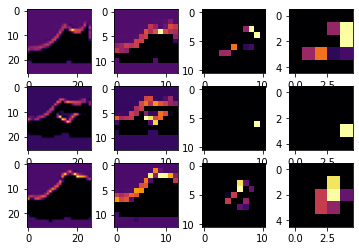

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(3, 4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 15

layer_outputs = [layer.output for layer in model.layers]
# print(len(layer_outputs))
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
print(activation_model)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  # print(f1)
  ax[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[2,x].grid(False)

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs, logs={}):
    if (logs.get('loss')<0.3):
      self.model.stop_training = True
      
callbacks = myCallback()